<a href="https://colab.research.google.com/github/ValentineFil/-Projects_in_Pytorch/blob/main/A_Dive_into_Natural_Language_Processing_Lesson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Dive into Natural Language Processing.

PyTorch and PyTorch Lightning examples.



PyTorch — framework для обучения нейронных сетей от Facebook AI Research lab (FAIR).

- При обучении мы имеем композицию из различных функций
- Framework должен уметь построить граф вычислений
- Дифференцировать и вычислять этот граф

## Tensors

Тензоры — это абстракция для хранения и манипуляции массивами данных.

Тензоры бывают различных типов. Основные типы:

```
  torch.FloatTensor     # 32 бита,  с плавающей точкой
  torch.DoubleTensor    # 64 бита, с плавающей точкой
  
  torch.IntTensor       # 32 бита, целочисленный, знаковый
  torch.LongTensor      # 64 бита, целочисленный, знаковый
```

Все типы: https://pytorch.org/docs/stable/tensors.html


In [ ]:
import torch

In [ ]:
a = torch.FloatTensor([2.0])
b = torch.FloatTensor([3.0])

In [ ]:
a + b

tensor([5.])

###Операции над тензорами

Над тензорами можно выполнять стандартные операции. Кроме того, есть договоренность, что функция возвращает копию объекта, а ее аналог с нижним подчеркиванием меняет сам объект в памяти.

In [ ]:
c = torch.add(a, b)

a, b, c

(tensor([2.]), tensor([3.]), tensor([5.]))

In [ ]:
a.add_(b)

a, b, c

(tensor([5.]), tensor([3.]), tensor([5.]))

In [ ]:
c = a.sub(b)
print("sub:", c)

c = a.mul(b)
print("mul:", c)

c = a.div(b)
print("div:", c)

c = a.log()
print("log:", c)

c = a.exp()
print("exp:", c)

c = a.abs()
print("abs:", c)

sub: tensor([2.])
mul: tensor([15.])
div: tensor([1.6667])
log: tensor([1.6094])
exp: tensor([148.4132])
abs: tensor([5.])


In [ ]:
a = torch.FloatTensor([[2, 3, 4], [1, 2, 3]])
b = torch.FloatTensor([[1, 2], [5, 5], [4, 4]])

print(a.shape, b.shape, "\n")

c = a @ b
print("c:",c)

torch.Size([2, 3]) torch.Size([3, 2]) 

c: tensor([[33., 35.],
        [23., 24.]])


### Инициализация

In [ ]:
x = torch.FloatTensor(5, 5)

x

tensor([[3.0045e+16, 3.0768e-41, 7.0065e-44, 6.8664e-44, 6.3058e-44],
        [6.8664e-44, 6.8664e-44, 6.3058e-44, 6.8664e-44, 7.0065e-44],
        [1.1771e-43, 6.8664e-44, 7.4269e-44, 8.1275e-44, 6.8664e-44],
        [7.2868e-44, 8.1275e-44, 6.7262e-44, 7.8473e-44, 6.4460e-44],
        [7.2868e-44, 6.7262e-44, 7.8473e-44, 7.2868e-44, 7.9874e-44]])

In [ ]:
x.zero_()

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
x.fill_(5)

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

In [ ]:
x.random_(0, 100)

tensor([[21., 84.,  8., 80., 78.],
        [30., 85., 86., 26., 14.],
        [16., 34.,  1., 40., 66.],
        [22., 86., 75., 76., 29.],
        [19., 65.,  6., 16., 98.]])

In [ ]:
x.normal_(mean=0, std=1)

tensor([[ 1.4400,  0.4421, -1.0384, -1.5471, -0.5776],
        [-0.7187, -0.1461, -1.4844,  0.3728,  0.9839],
        [ 0.6123,  0.9401, -1.2333,  1.3863, -0.8733],
        [-0.7444, -0.5916,  0.2844,  0.8086,  0.7849],
        [-0.9836,  0.8965,  0.1472,  1.2668,  0.4356]])

In [ ]:
torch.eye(5, 5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

### Broadcasting

Подробнее здесь:

https://habr.com/ru/post/334380/

In [ ]:
x = torch.FloatTensor(5, 1, 4, 1)
y = torch.FloatTensor(   3, 1, 1)

(x+y).size()

torch.Size([5, 3, 4, 1])

torch.Size([5, 3, 4, 1])

### GPU

In [ ]:
x = torch.FloatTensor(5,5).normal_(0, 1)

x

tensor([[ 1.1442,  1.3271,  0.7583,  0.5461,  0.7615],
        [-1.1747,  0.2930, -1.6948, -1.1355, -0.2202],
        [ 0.2978, -0.5690, -1.3732,  0.3711,  0.4223],
        [ 0.9835, -1.2973, -0.3281, -1.3801, -0.3479],
        [-0.2458, -1.0453, -1.4363, -0.5010,  0.3658]])

In [ ]:
x = x.cuda()

In [ ]:
x.is_cuda

True

## Пример модели на PyTorch

In [ ]:
import torch

device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')

In [ ]:
torch.cuda.is_available

<function torch.cuda.is_available>

###Скачаем MNIST

In [ ]:
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import os

In [ ]:
tr = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.1307,), (0.3081,))
])

train = MNIST(os.getcwd(), train=True,  transform=tr, download=True)
test  = MNIST(os.getcwd(), train=False, transform=tr, download=True)

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

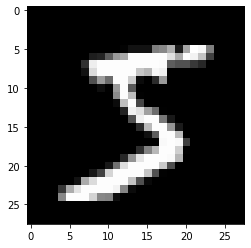

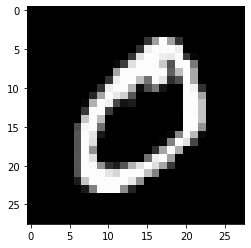

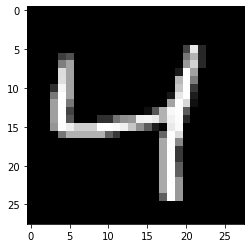

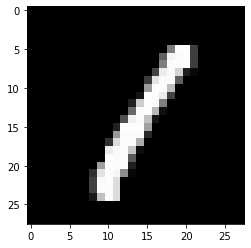

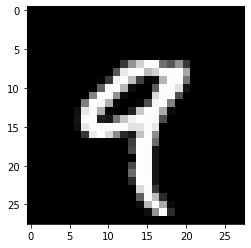

In [ ]:
from matplotlib import pyplot as plt

for x in x_batch[:5]:
  plt.imshow(x[0], cmap="gray")
  plt.show()

### Построим сеть

В модуле torch.nn уже содержатся разнообразные слои и функции активации и прочие части архитектуры сети, про которые мы говорили. Комбинируя их, можно составлять свою архитектуру сети.

Содержимое модуля nn: https://pytorch.org/docs/stable/nn.html


In [ ]:
import torch.nn as nn
from torchsummary import summary

input_dim = 28 * 28
hidden_dim = 100

out_dim = 10

model = nn.Sequential(
  nn.Linear(input_dim, hidden_dim),
  nn.ReLU(),
  nn.Linear(hidden_dim, out_dim)
)

model.cuda()

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
summary(model, (input_dim,), batch_size=228)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [228, 100]          78,500
              ReLU-2                 [228, 100]               0
            Linear-3                  [228, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.68
Forward/backward pass size (MB): 0.37
Params size (MB): 0.30
Estimated Total Size (MB): 1.35
----------------------------------------------------------------


In [ ]:
loss_function = nn.CrossEntropyLoss()
learning_rate = 3e-4

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

[Про оптимизаторы](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)


In [ ]:
epochs = 3
history = []

In [ ]:
#train loop

from tqdm  import tqdm

for i in range(epochs):
  print("\nEpoch", i)

  for batch in tqdm(train_loader):

    x, y = batch
    
    #0 Приведем тензоры в нужный формат
    b = x.size(0)

    x = x.view(b, -1).to(device)
    y = y.to(device)

    #1 Посчитаем логиты
    y_pred = model(x)

    #2 Посчитаем лосс
    loss = loss_function(y_pred, y)

    #3 Обнулим градиенты
    optimizer.zero_grad()

    #4 Накопим градиенты
    loss.backward()

    #5 Шаг оптимизации
    optimizer.step()

    history.append(loss.item())


  print(f'{i+1},\t loss: {history[-1]: 2f}')


Epoch 0


100%|██████████| 468/468 [00:08<00:00, 56.97it/s]


1,	 loss:  0.317575

Epoch 1


100%|██████████| 468/468 [00:08<00:00, 56.95it/s]


2,	 loss:  0.138149

Epoch 2


100%|██████████| 468/468 [00:08<00:00, 56.84it/s]

3,	 loss:  0.096210


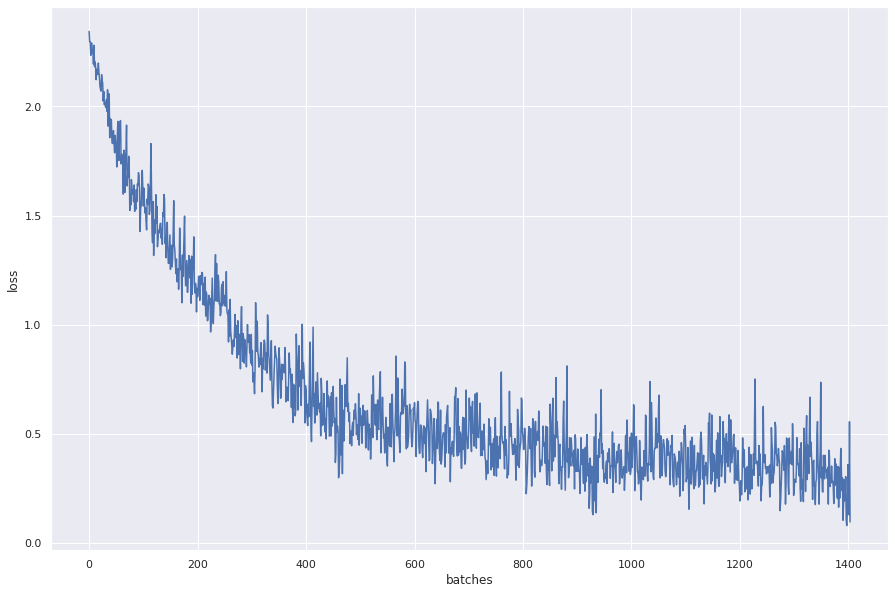

In [ ]:
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(15, 10))
plt.ylabel('loss')
plt.xlabel('batches')

sns.lineplot(data=history)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = 0
batches = 0

for batch in test_loader:
    batches += 1
  
    x, y = batch
    b = x.size(0)

    x = x.view(b, -1).to(device)
    y = y.to(device)

    with torch.no_grad():
      y_pred = model(x)

    preds = torch.argmax(y_pred, dim=1)
    acc += (preds==y).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.911


## PyTorch Lightning



![](https://github.com/rubentea16/pl-mnist/raw/master/images/lightning_module/pt_to_pl.png)

In [ ]:
!pip install pytorch-lightning --quiet

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 596 kB 59.0 MB/s 
     |████████████████████████████████| 132 kB 66.1 MB/s 
     |████████████████████████████████| 329 kB 54.4 MB/s 
     |████████████████████████████████| 829 kB 50.4 MB/s 
     |████████████████████████████████| 1.1 MB 37.3 MB/s 
     |████████████████████████████████| 192 kB 72.1 MB/s 
     |████████████████████████████████| 271 kB 71.0 MB/s 
     |████████████████████████████████| 160 kB 74.6 MB/s 


In [ ]:
from torch.nn import functional as F
from torch import nn
from pytorch_lightning.core.lightning import LightningModule
import pytorch_lightning as pl
from torch.utils.data import random_split

import torchmetrics
accuracy = torchmetrics.Accuracy()

In [ ]:
class OurFirstPlModel(pl.LightningModule):
  def __init__(self):
    super().__init__()    
    self.layer_1 = nn.Linear(28 * 28, 64)
    self.layer_2 = nn.Linear(64, 10)    
    self.loss = nn.CrossEntropyLoss()
    self.metric = torchmetrics.Accuracy()
    self.batch_size = 128

  def forward(self, x):
    h1 = F.relu(self.layer_1(x))
    logits = self.layer_2(h1)    
    return logits

  def configure_optimizers(self):
    # выбираем оптимизатор
    return torch.optim.Adam(self.parameters(), lr=1e-3)



  def training_step(self, batch, batch_idx):
    #приведем тензоры в нужный формат
    x, y = batch
    x = x.view(x.size(0), -1)
    logits = self(x)

    #посчитаем лосс
    loss = self.loss(logits, y)

    acc = self.metric(logits, y)
    self.log("train_acc", acc)
    
    return loss



  def train_dataloader(self):
    tr = transforms.Compose([transforms.ToTensor()])
    train_data = MNIST(os.getcwd(), train=True,  transform=tr, download=True)
    self.train, self.val = random_split(train_data, [55000, 5000])    
    train_loader = DataLoader(self.train, batch_size=self.batch_size)    
    return train_loader

model = OurFirstPlModel()


In [ ]:
trainer = pl.Trainer(max_epochs=3, gpus=1)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | layer_1 | Linear           | 50.2 K
1 | layer_2 | Linear           | 650   
2 | loss    | CrossEntropyLoss | 0     
3 | metric  | Accuracy         | 0     
---------------------------------------------
50.9 K    Trainable params
0         Non-trainable params
50.9 K    Total params
0.204     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [ ]:
!ls lightning_logs/version_2/checkpoints



'epoch=2-step=1289.ckpt'


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/

In [ ]:
class MNISTDataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str = "./"):
        super().__init__()
        self.data_dir = data_dir
        self.transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
        self.dims = (1, 28, 28)

    def prepare_data(self):
        MNIST(self.data_dir, train=True, download=True)
        MNIST(self.data_dir, train=False, download=True)

    def setup(self, stage = None):
        if stage == "fit" or stage is None:
            mnist_full = MNIST(self.data_dir, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])
            
        if stage == "test" or stage is None:
            self.mnist_test = MNIST(self.data_dir, train=False, transform=self.transform)

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=256)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=256)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=256)

class OurFirstPlModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(28 * 28, 128)
    self.layer_2 = nn.Linear(128, 10)
    self.loss = nn.CrossEntropyLoss()
    self.metric = torchmetrics.Accuracy()
    self.batch_size = 128

  def forward(self, x):
    h1 = F.relu(self.layer_1(x))
    logits = self.layer_2(h1)
    
    return logits

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=3e-4)

  def training_step(self, batch, batch_idx):
    x, y = batch
    x = x.view(x.size(0), -1)
    logits = self(x)
    loss = self.loss(logits, y)

    acc = self.metric(logits, y)
    logs = {'train_acc': acc}
    self.log("train_acc", acc)
    
    return {'loss': loss, 'progress_bar': logs}

  def validation_step(self, batch, batch_idx):
    results = self.training_step(batch, batch_idx)
    return results

  def validation_epoch_end(self, val_step_outputs):
    avg_val_loss = torch.tensor([x['loss'] for x in val_step_outputs]).mean()
    return {'val_loss': avg_val_loss}

model = OurFirstPlModel()
dm = MNISTDataModule()

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:175: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation("DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.")


In [ ]:
trainer = pl.Trainer(max_epochs=5, gpus=1)
trainer.fit(model, dm)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | layer_1 | Linear           | 100 K 
1 | layer_2 | Linear           | 1.3 K 
2 | loss    | CrossEntropyLoss | 0     
3 | metric  | Accuracy         | 0     
---------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
!ls lightning_logs/version_23

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/

[Подробнее про хуки](https://pytorch-lightning.readthedocs.io/en/stable/api/pytorch_lightning.core.hooks.html)